In [1]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [47]:
df = pd.read_table('/content/drive/MyDrive/dataset/access-20200423-campur.log')
df.head(5)

,Data
0,77.247.110.199 - - [23/Apr/2021:00:49:22 +0000...
1,77.247.110.199 - - [23/Apr/2021:00:49:22 +0000...
2,92.118.160.17 - - [23/Apr/2021:01:11:22 +0000]...
3,92.118.160.17 - - [23/Apr/2021:01:11:22 +0000]...
4,103.142.110.26 - - [23/Apr/2021:01:51:15 +0000...


In [48]:
len(df)

1002

# Split Data

In [49]:
pattern = r'^(\S+) - - \[(.*?)\] "(.*?)" "(.*?)"'

# Mengekstrak data IP, waktu, request, dan user agent menggunakan regex
df[['IP', 'Timestamp', 'Request', 'UserAgent']] = df['Data'].str.extract(pattern)

# Menampilkan hasil
print(df[['IP', 'Timestamp', 'Request', 'UserAgent']])

                  IP                   Timestamp  \
0     77.247.110.199  23/Apr/2021:00:49:22 +0000   
1     77.247.110.199  23/Apr/2021:00:49:22 +0000   
2      92.118.160.17  23/Apr/2021:01:11:22 +0000   
3      92.118.160.17  23/Apr/2021:01:11:22 +0000   
4     103.142.110.26  23/Apr/2021:01:51:15 +0000   
...              ...                         ...   
997   182.253.163.96  23/Apr/2021:02:43:18 +0000   
998     80.67.220.25  23/Apr/2021:03:01:42 +0000   
999     74.120.14.54  23/Apr/2021:03:21:11 +0000   
1000    74.120.14.54  23/Apr/2021:03:21:12 +0000   
1001  192.241.218.80  23/Apr/2021:05:01:12 +0000   

                                                Request  \
0                        GET /.env HTTP/1.1" 404 199 "-   
1                             POST / HTTP/1.1" 302 5 "-   
2                              GET / HTTP/1.1" 302 5 "-   
3     GET /home.php HTTP/1.1" 200 18 "http://103.150...   
4                              GET / HTTP/1.1" 302 5 "-   
...                  

In [50]:
df

,Data,IP,Timestamp,Request,UserAgent
0,77.247.110.199 - - [23/Apr/2021:00:49:22 +0000...,77.247.110.199,23/Apr/2021:00:49:22 +0000,"GET /.env HTTP/1.1"" 404 199 ""-",Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
1,77.247.110.199 - - [23/Apr/2021:00:49:22 +0000...,77.247.110.199,23/Apr/2021:00:49:22 +0000,"POST / HTTP/1.1"" 302 5 ""-",Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
2,92.118.160.17 - - [23/Apr/2021:01:11:22 +0000]...,92.118.160.17,23/Apr/2021:01:11:22 +0000,"GET / HTTP/1.1"" 302 5 ""-",NetSystemsResearch studies the availability of...
3,92.118.160.17 - - [23/Apr/2021:01:11:22 +0000]...,92.118.160.17,23/Apr/2021:01:11:22 +0000,"GET /home.php HTTP/1.1"" 200 18 ""http://103.150...",Go http package
4,103.142.110.26 - - [23/Apr/2021:01:51:15 +0000...,103.142.110.26,23/Apr/2021:01:51:15 +0000,"GET / HTTP/1.1"" 302 5 ""-",Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
...,...,...,...,...,...
997,182.253.163.96 - - [23/Apr/2021:02:43:18 +0000...,182.253.163.96,23/Apr/2021:02:43:18 +0000,GET /mod.php?kategori=php://filter/convert.bas...,Mozilla/5.0 (X11; Linux x86_64; rv:45.0) Gecko...
998,80.67.220.25 - - [23/Apr/2021:03:01:42 +0000] ...,80.67.220.25,23/Apr/2021:03:01:42 +0000,"GET / HTTP/1.1"" 302 5 ""-",Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
999,74.120.14.54 - - [23/Apr/2021:03:21:11 +0000] ...,74.120.14.54,23/Apr/2021:03:21:11 +0000,"GET / HTTP/1.1"" 302 5 ""-",-
1000,74.120.14.54 - - [23/Apr/2021:03:21:12 +0000] ...,74.120.14.54,23/Apr/2021:03:21:12 +0000,"GET / HTTP/1.1"" 302 5 ""-",Mozilla/5.0 (compatible; CensysInspect/1.1; +h...


# Cluster All

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(ip, time, request, maxx_features):

    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X_ip = vectorizer.fit_transform(ip)
    X_time = vectorizer.fit_transform(time)
    X_request = vectorizer.fit_transform(request)

    return X_ip, X_time, X_request

In [52]:
text = df['IP'].values
text1 = df['Timestamp'].values
text2 = df['Request'].values
max_features = 2**12

X_ip, X_time, X_request = vectorize(text, text1, text2, max_features)

In [53]:
X = np.hstack((X_ip.toarray(), X_time.toarray(), X_request.toarray()))

#### Metode Elbow

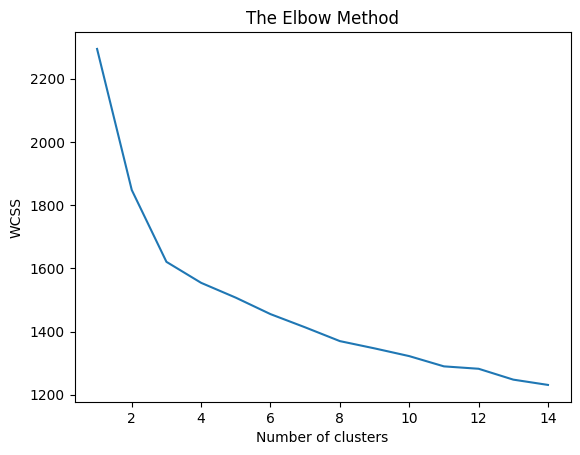

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#membuat array dengan nama wcss
wcss = []
#melakukan perulangan dari 1 sampai 11
for i in range(1, 15):
    #membuat nama variabel = kmeans yang mendeskripsikan jumlah cluster, perulangan k-means, dan random statenya
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    # init = metode untuk inisialisasi centroid (pusat klaster). kenapa 'k-means++' karena dapat menghasilkan centroid awal yang lebih baik.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#menampilkan plot wcss

plt.plot(range(1, 15), wcss)
#memberikan label plot dengan judul The Elbow Method
plt.title('The Elbow Method')
#memberikan label x dengan nama Number of clusters
plt.xlabel('Number of clusters')
#memberikan label y dengan nama WCSS
plt.ylabel('WCSS')
plt.savefig('/content/drive/MyDrive/dataset/Serangan_Clustering/Cluster_all_done/elbow.png')
#menampilkan plot
plt.show()

#### Metode Silhoutte

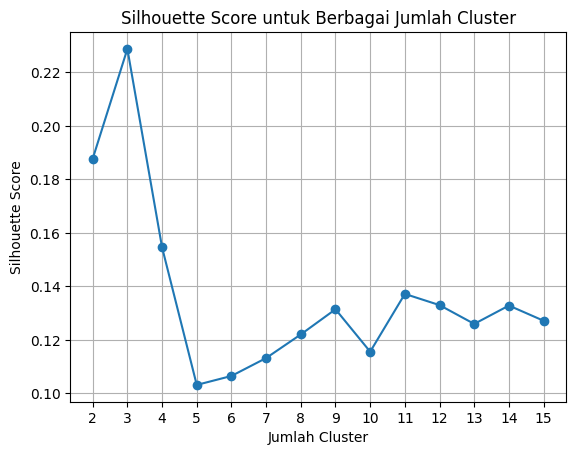

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k=15
# List untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Iterasi untuk mencoba berbagai jumlah cluster
for n_clusters in range(2, k+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot visualisasi Silhouette Score
plt.plot(range(2, k+1), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xticks(np.arange(2, k+1))
plt.grid()
plt.savefig('/content/drive/MyDrive/dataset/Serangan_Clustering/Cluster_all_done/silhoutee.png')
plt.show()


In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt

silhouette_scores = []

for num_clusters in range(2, k):
    clustering_kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans_indices = clustering_kmeans.fit_predict(X)

    silhouette_avg = metrics.silhouette_score(X, kmeans_indices)
    silhouette_scores.append(silhouette_avg)

    print(f'Silhouette coefficient for {num_clusters} clusters = {silhouette_avg:.4f}')

Silhouette coefficient for 2 clusters = 0.1877
Silhouette coefficient for 3 clusters = 0.2288
Silhouette coefficient for 4 clusters = 0.1541
Silhouette coefficient for 5 clusters = 0.1031
Silhouette coefficient for 6 clusters = 0.1079
Silhouette coefficient for 7 clusters = 0.1083
Silhouette coefficient for 8 clusters = 0.1245
Silhouette coefficient for 9 clusters = 0.1358
Silhouette coefficient for 10 clusters = 0.1361
Silhouette coefficient for 11 clusters = 0.1147
Silhouette coefficient for 12 clusters = 0.1453
Silhouette coefficient for 13 clusters = 0.1459
Silhouette coefficient for 14 clusters = 0.1304


In [58]:
len(range(2,k))

13

In [60]:
silhouette_df = pd.DataFrame({ 'Cluster': range(2, k),'Silhouette Scores':silhouette_scores})
silhouette_df.to_csv('/content/drive/MyDrive/dataset/Serangan_Clustering/Cluster_all_done/silhoutee.csv', index=False)

#### Model

In [61]:
k_cluster = 3
clustering_kmeans = KMeans(n_clusters=k_cluster)
clust = clustering_kmeans.fit_predict(X)
df['cluster'],df['cluster']=[clust,clust]

In [62]:
df

,Data,IP,Timestamp,Request,UserAgent,cluster
0,77.247.110.199 - - [23/Apr/2021:00:49:22 +0000...,77.247.110.199,23/Apr/2021:00:49:22 +0000,"GET /.env HTTP/1.1"" 404 199 ""-",Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2
1,77.247.110.199 - - [23/Apr/2021:00:49:22 +0000...,77.247.110.199,23/Apr/2021:00:49:22 +0000,"POST / HTTP/1.1"" 302 5 ""-",Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2
2,92.118.160.17 - - [23/Apr/2021:01:11:22 +0000]...,92.118.160.17,23/Apr/2021:01:11:22 +0000,"GET / HTTP/1.1"" 302 5 ""-",NetSystemsResearch studies the availability of...,2
3,92.118.160.17 - - [23/Apr/2021:01:11:22 +0000]...,92.118.160.17,23/Apr/2021:01:11:22 +0000,"GET /home.php HTTP/1.1"" 200 18 ""http://103.150...",Go http package,2
4,103.142.110.26 - - [23/Apr/2021:01:51:15 +0000...,103.142.110.26,23/Apr/2021:01:51:15 +0000,"GET / HTTP/1.1"" 302 5 ""-",Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2
...,...,...,...,...,...,...
997,182.253.163.96 - - [23/Apr/2021:02:43:18 +0000...,182.253.163.96,23/Apr/2021:02:43:18 +0000,GET /mod.php?kategori=php://filter/convert.bas...,Mozilla/5.0 (X11; Linux x86_64; rv:45.0) Gecko...,0
998,80.67.220.25 - - [23/Apr/2021:03:01:42 +0000] ...,80.67.220.25,23/Apr/2021:03:01:42 +0000,"GET / HTTP/1.1"" 302 5 ""-",Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2
999,74.120.14.54 - - [23/Apr/2021:03:21:11 +0000] ...,74.120.14.54,23/Apr/2021:03:21:11 +0000,"GET / HTTP/1.1"" 302 5 ""-",-,2
1000,74.120.14.54 - - [23/Apr/2021:03:21:12 +0000] ...,74.120.14.54,23/Apr/2021:03:21:12 +0000,"GET / HTTP/1.1"" 302 5 ""-",Mozilla/5.0 (compatible; CensysInspect/1.1; +h...,2


In [63]:
df.to_csv('/content/drive/MyDrive/dataset/Serangan_Clustering/Cluster_all_done/cluster_serangan_hasil_all.csv', index=False)

#### Visualisasi

In [64]:
ii_cluster =[]

for i in range(k_cluster):
  ii_cluster.append("Cluster %d:" % i)

In [65]:
Nilai = df['cluster'].value_counts()
Nilai

1    508
0    367
2    127
Name: cluster, dtype: int64

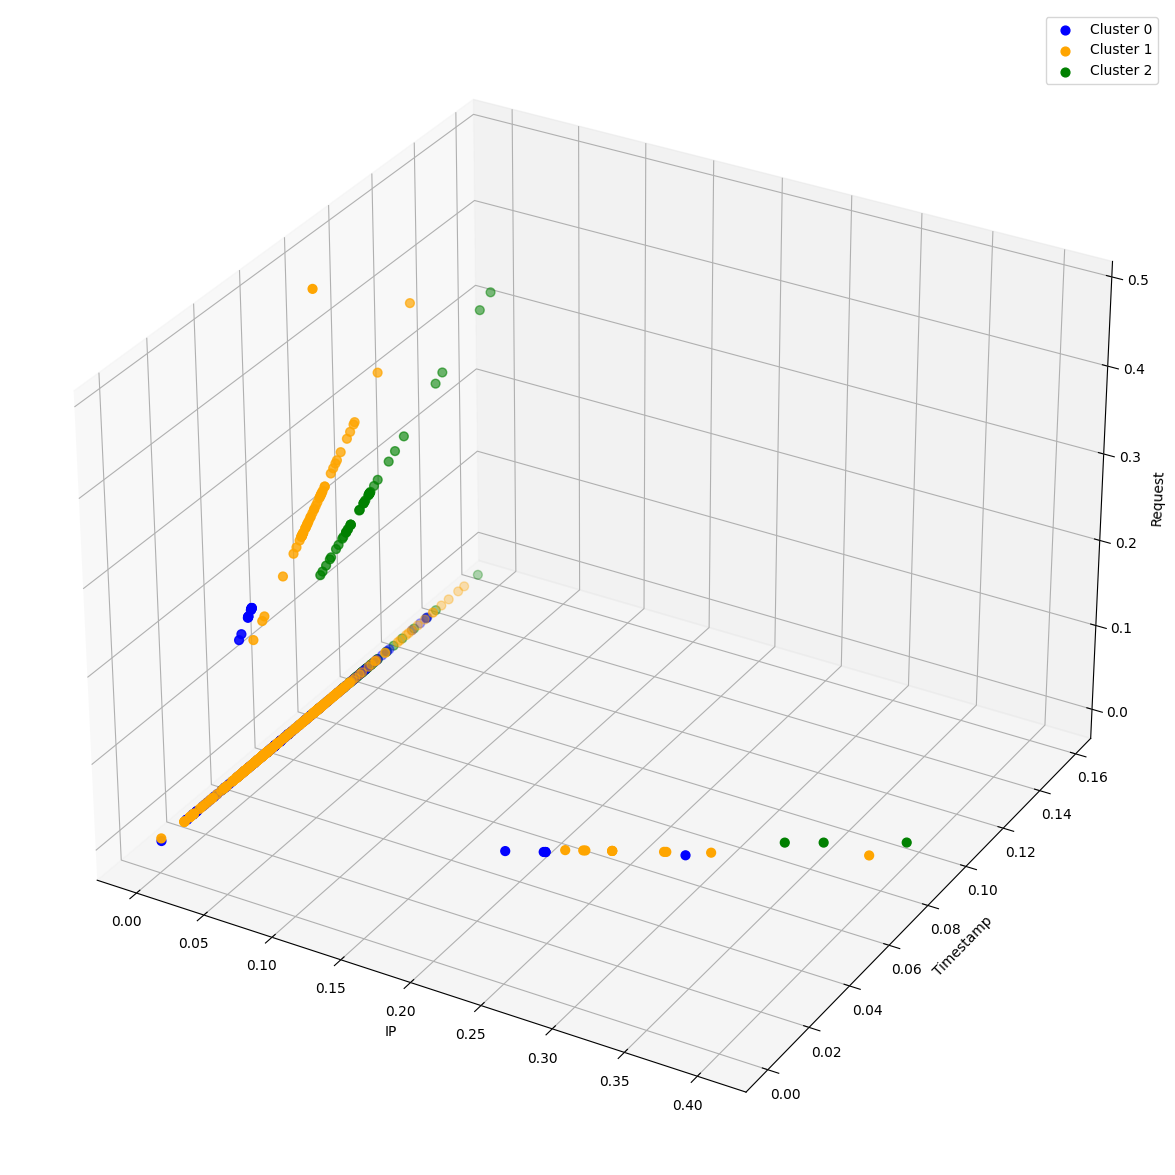

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

df['cluster'] = clust

# Create scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'orange', 'green', '#D12B60', 'purple', 'red', 'pink', 'cyan']

for i in range(k_cluster):
    cluster_data = df[df['cluster'] == i]
    text_data = cluster_data[['IP', 'Timestamp', 'Request']].astype(str).agg(' '.join, axis=1)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(text_data)
    tfidf_array = tfidf_matrix.toarray()
    ax.scatter(tfidf_array[:, 0], tfidf_array[:, 1], tfidf_array[:, 2], s=40, color=colors[i], label=f'Cluster {i}')

ax.set_xlabel('IP')
ax.set_ylabel('Timestamp')
ax.set_zlabel('Request')
ax.legend()
plt.savefig('/content/drive/MyDrive/dataset/Serangan_Clustering/Cluster_all_done/scatter_plot.png')
plt.show()


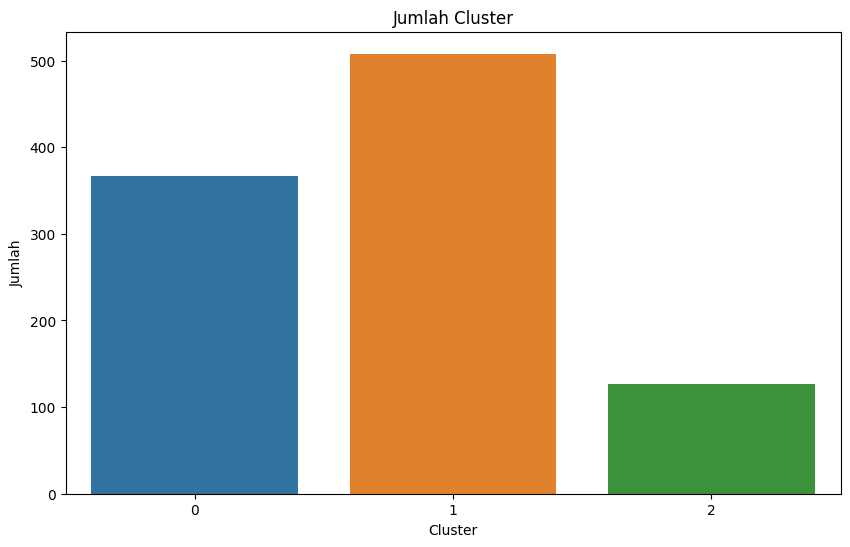

In [67]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=Nilai.index, y=Nilai.values)
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.title('Jumlah Cluster')
plt.savefig('/content/drive/MyDrive/dataset/Serangan_Clustering/Cluster_all_done/jumlah_cluster.png')
plt.show()

In [71]:
silhouette_df = pd.DataFrame({ 'Cluster': range(1, 4),'Jumlah':Nilai.values})
silhouette_df.to_csv('/content/drive/MyDrive/dataset/Serangan_Clustering/Cluster_all_done/jumlah_cluster.csv', index=False)

In [72]:
unique_clusters = df['cluster'].unique()

# Memisahkan hasil cluster dan menyimpannya dalam file CSV
for cluster_value in unique_clusters:
    cluster_df = df[df['cluster'] == cluster_value]
    cluster_name = f'cluster_{cluster_value}'
    csv_filename = f'/content/drive/MyDrive/dataset/Serangan_Clustering/Cluster_all_done/{cluster_name}.csv'
    cluster_df.to_csv(csv_filename, index=False)